# Libraries

In [2]:
!pip install gurobipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 65.0 MB/s eta 0:00:00


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import chain, combinations, permutations, product
import time
from tqdm import tqdm
import gurobipy as gp
from gurobipy import GRB
import networkx as nx
from matplotlib.patches import Rectangle

In [4]:
WLSACCESSID = '< Copy your WLSACCESSID here >'
WLSSECRET = '< Copy your WLSSECRET here >'
LICENSEID = '< Copy your LICENSEID here >'

In [5]:
params = {
"WLSACCESSID": WLSACCESSID,
"WLSSECRET": WLSSECRET,
"LICENSEID": LICENSEID,
}
env = gp.Env(params=params)

Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 939556
Academic license 939556 - for non-commercial use only - registered to lu___@ieseg.fr


# Simple knapsack paper mario example

In [6]:
paper_mario = pd.read_csv('https://raw.githubusercontent.com/ceche1212/Youtube_optimization/main/paper_mario_items_knapsack.csv')

In [7]:
paper_mario

,Item,Purchase Price,Heal,FP,Attack,Status Enemy,Status Player,Selling Price,Heal Power,FP Power
0,Tasty Tonic,3,0,0,0,0,1,1,0,0
1,Honey Syrup,5,0,1,0,0,0,1,0,5
2,Mushroom,5,1,0,0,0,0,1,5,0
3,Fright Mask,5,0,0,0,1,0,1,0,0
4,Sleepy Sheep,8,0,0,0,1,0,2,0,0
5,Fire Flower,10,0,0,1,0,0,3,0,0
6,Dried Shroom,2,1,0,0,0,0,1,2,0
7,Earth Quake,18,0,0,1,0,0,6,0,0
8,Repel Cape,18,0,0,0,0,1,6,0,0
9,Boo's Sheet,24,0,0,0,0,1,8,0,0


In [8]:
I = range(len(paper_mario)) # set of items I

model = gp.Model("paper_mario_knp",env=env)

#variable creation
x = model.addVars(I,vtype= GRB.INTEGER,name = 'x')

#objective function
model.setObjective(gp.quicksum(x[i]*paper_mario['Selling Price'][i] for i in I),GRB.MAXIMIZE);

#constraints
model.addConstr(gp.quicksum(x[i] for i in I) == 15) # less than 15 items
model.addConstr(gp.quicksum(x[i]*paper_mario['Purchase Price'][i] for i in I) <= 200) # less than 200 of budget
model.addConstr(gp.quicksum(x[i]*paper_mario['Heal Power'][i] for i in I) >= 25) # at least 25 healing power
model.addConstr(gp.quicksum(x[i]*paper_mario['FP Power'][i] for i in I) >= 25) # at least 25 FP power items
model.addConstr(gp.quicksum(x[i]*paper_mario['Status Player'][i] for i in I) >= 1) # at least 1 player status item
model.addConstr(gp.quicksum(x[i]*paper_mario['Attack'][i] for i in I) >= 3) # at least 2 attack items

# set params
tl = 120
mipgap = 0.0

model.setParam('TimeLimit', tl)
model.setParam('MIPGap', mipgap)
model.optimize()

Set parameter TimeLimit to value 120
Set parameter MIPGap to value 0
Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (linux64 - "Ubuntu 22.04.3 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Academic license 939556 - for non-commercial use only - registered to lu___@ieseg.fr
Optimize a model with 6 rows, 34 columns and 95 nonzeros
Model fingerprint: 0x00fc52de
Variable types: 0 continuous, 34 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+02]
  Objective range  [1e+00, 4e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 2e+02]
Found heuristic solution: objective 23.0000000
Presolve removed 0 rows and 15 columns
Presolve time: 0.00s
Presolved: 6 rows, 19 columns, 55 nonzeros
Found heuristic solution: objective 69.0000000
Variable types: 0 continuous, 19 integer (2 binary)

Root relaxation: objective 7.028986e+01, 16 iterations, 0.00 s

In [9]:
print("Items:")
for item in x.keys():
  if x[item].x >= 0.99:
    print("- ",paper_mario['Item'][item],"QTY:", x[item].x)
    # print(item,paper_mario['Item'][item])
print("Total value of the inventory:",model.ObjVal)

Items:
-  Mushroom QTY: 1.0
-  Dried Shroom QTY: 10.0
-  Shooting Star QTY: 1.0
-  Jammin' Jelly QTY: 1.0
-  Mystery QTY: 1.0
-  Ice Storm QTY: 1.0
Total value of the inventory: 69.0


# 2-Dimensional Knapsack with rotations

Formulation

* Variables

    1. $x_i, y_i$: Coordinates of the bottom-left corner of rectangle $i$
    2. $z_i$: Binary variable that is 1 if rectangle $i$ is placed on the sheet, and 0 otherwise
    3. $b_{ij}^k$: Binary variables to handle the "or" conditions for non-overlapping constraints ($k \in \{1, 2, 3, 4\}$)
    4. $r_i$: Binary variable that handles if item $i$ is rotated or not

* Objective Function
$$
\text{Maximize} \quad \sum_{i=1}^{n} z_i \cdot v_i
$$

* Constraints
\begin{align}
    & x_i + (w_i\cdot r_i + h_i \cdot (1-r_i)) \cdot z_i \leq W \quad \forall i \\
    & y_i + (h_i\cdot r_i + w_i \cdot (1-r_i)) \cdot z_i \leq H \quad \forall i \\
    & x_i + (w_i\cdot r_i + h_i \cdot (1-r_i))\cdot z_i \leq x_j + M \cdot (1- b_{ij}^1) \quad \forall i \neq j\\
    & x_j + (w_j\cdot r_j + h_j \cdot (1-r_j))\cdot z_j \leq x_i + M \cdot(1- b_{ij}^2) \quad \forall i \neq j\\
    & y_i + (h_i\cdot r_i + w_i \cdot (1-r_i)) \cdot z_i \leq y_j + M \cdot(1- b_{ij}^3) \quad \forall i \neq j\\
    & y_j + (h_j\cdot r_j + w_j \cdot (1-r_j)) \cdot z_j \leq y_i + M \cdot(1- b_{ij}^4) \quad \forall i \neq j\\
    & \sum_{k=1}^{4}b_{ij}^k \geq 1 \quad \forall i \neq j \\
    & z_i \in \{0, 1\} \quad \forall i \\
    & b_{ij}^k \in \{0, 1\} \quad \forall i \neq j, \quad \forall k \in \{1, 2, 3 , 4\}
\end{align}

## Data and Preprocessing

In [10]:
widths = [6,1,2,3,3]
heights =[2,1,1,2,4]
colors = ['red','skyblue','green','yellow','orange']
values = [15,2,2,7,20]

W = 15
H = 8
quants = [10,10,10,10,10]

top = max(W,H)

df = pd.DataFrame()
df['quantity'] = quants
df['heights'] = heights
df['widths'] = widths
df['color'] = colors
df['values'] = values

,quantity,heights,widths,color,values
0,10,2,6,red,15
1,10,1,1,skyblue,2
2,10,1,2,green,2
3,10,2,3,yellow,7
4,10,4,3,orange,20


In [11]:
WIDTHS = []
HEIGHTS = []
VALUES = []
COLORS = []
for q,w,h,v,c in zip(quants,widths,heights,values,colors):
  for x in range(q):
    HEIGHTS.append(w)
    WIDTHS.append(h)
    VALUES.append(v)
    COLORS.append(c)

data_df = pd.DataFrame()
data_df['HEIGHTS'] = HEIGHTS
data_df['WIDTHS'] = WIDTHS
data_df['VALUES'] = VALUES
data_df['COLORS'] = COLORS

In [12]:
data_df

,HEIGHTS,WIDTHS,VALUES,COLORS
0,6,2,15,red
1,6,2,15,red
2,6,2,15,red
3,6,2,15,red
4,6,2,15,red
5,6,2,15,red
6,6,2,15,red
7,6,2,15,red
8,6,2,15,red
9,6,2,15,red


In [13]:
N = len(WIDTHS)
M = max(sum(WIDTHS),sum(HEIGHTS))

## Problem formulation

In [34]:
I = range(N) # for the indexes of each asset "i"
K = range(4) # for the index of the OR variables "b"

In [35]:
model = gp.Model("Two_dimensional_knapsack",env=env)

# Variable Creation
x = model.addVars(I,lb = 0,ub = top,vtype=GRB.CONTINUOUS, name="x")
y = model.addVars(I,lb = 0,ub = top,vtype=GRB.CONTINUOUS, name="y")

Z = model.addVars(I,vtype=GRB.BINARY,name = 'Z')

b_vars = [(i,j,k) for i in I for j in I if j!=i for k in K]

B = model.addVars(b_vars,vtype = GRB.BINARY,name = "B")

R = model.addVars(I,vtype=GRB.BINARY,name = 'R')

# Objective function
model.setObjective(gp.quicksum(Z[i]*data_df['VALUES'][i] for i in I),GRB.MAXIMIZE);

# constraints
for i in I:

  model.addConstr(x[i] + (data_df['WIDTHS'][i]*R[i] + data_df['HEIGHTS'][i]*(1-R[i]))*Z[i] <= W)
  model.addConstr(y[i] + (data_df['HEIGHTS'][i]*R[i] + data_df['WIDTHS'][i]*(1-R[i]))*Z[i] <= H)

for i in I:
  for j in I:
    if i == j:
      continue
    else:
      model.addConstr(x[i] + (data_df['WIDTHS'][i]*R[i] + data_df['HEIGHTS'][i]*(1-R[i]))*Z[i] <= x[j] + M*(1-B[i,j,0]))
      model.addConstr(x[j] + (data_df['WIDTHS'][j]*R[j] + data_df['HEIGHTS'][j]*(1-R[j]))*Z[j] <= x[i] + M*(1-B[i,j,1]))

      model.addConstr(y[i] + (data_df['HEIGHTS'][i]*R[i] + data_df['WIDTHS'][i]*(1-R[i]))*Z[i] <= y[j] + M*(1-B[i,j,2]))
      model.addConstr(y[j] + (data_df['HEIGHTS'][j]*R[j] + data_df['WIDTHS'][j]*(1-R[j]))*Z[j] <= y[i] + M*(1-B[i,j,3]))

      model.addConstr(B[i,j,0] + B[i,j,1] + B[i,j,2] + B[i,j,3] >= 1)

## Solving the model

In [36]:
tl = 1200
mip_gap = 0.05

model.setParam('TimeLimit', tl)
model.setParam('MIPGap', mip_gap)
model.optimize()

Set parameter TimeLimit to value 1200
Set parameter MIPGap to value 0.05
Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (linux64 - "Ubuntu 22.04.3 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Academic license 939556 - for non-commercial use only - registered to lu___@ieseg.fr
Optimize a model with 2450 rows, 10000 columns and 9800 nonzeros
Model fingerprint: 0x41f6f8f9
Model has 9900 quadratic constraints
Variable types: 100 continuous, 9900 integer (9900 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [1e+00, 4e+00]
  QLMatrix range   [1e+00, 2e+02]
  Objective range  [2e+00, 2e+01]
  Bounds range     [1e+00, 2e+01]
  RHS range        [1e+00, 1e+00]
  QRHS range       [8e+00, 2e+02]
Presolve added 9254 rows and 0 columns
Presolve removed 0 rows and 4090 columns
Presolve time: 0.33s
Presolved: 11704 rows, 5910 columns, 51120 nonzeros
V

## Extract and plot the solution

In [37]:
for item in Z.keys():
  if Z[item].x >= 0.99:
    print(COLORS[item],Z[item].x,R[item].x >0.5,x[item].x,y[item].x,(WIDTHS[item],HEIGHTS[item]))

skyblue 1.0 False 9.0 7.0 (1, 1)
skyblue 1.0 False 0.0 5.0 (1, 1)
skyblue 1.0 False 14.0 7.0 (1, 1)
skyblue 1.0 False 1.0 7.0 (1, 1)
skyblue 1.0 False 3.0 7.0 (1, 1)
skyblue 1.0 False 10.0 7.0 (1, 1)
skyblue 1.0 False 0.0 4.0 (1, 1)
skyblue 1.0 False 2.0 7.0 (1, 1)
skyblue 1.0 False 8.0 7.0 (1, 1)
skyblue 1.0 False 11.0 7.0 (1, 1)
green 1.0 False 12.0 7.0 (1, 2)
green 1.0 False 4.0 7.0 (1, 2)
green 1.0 False 6.0 7.0 (1, 2)
green 1.0 True 0.0 6.0 (1, 2)
yellow 1.0 True 9.0 4.0 (2, 3)
orange 1.0 False 3.0 0.0 (4, 3)
orange 1.0 False 12.0 0.0 (4, 3)
orange 1.0 True 1.0 4.0 (4, 3)
orange 1.0 False 9.0 0.0 (4, 3)
orange 1.0 True 5.0 4.0 (4, 3)
orange 1.0 False 6.0 0.0 (4, 3)
orange 1.0 False 0.0 0.0 (4, 3)
orange 1.0 True 11.0 4.0 (4, 3)


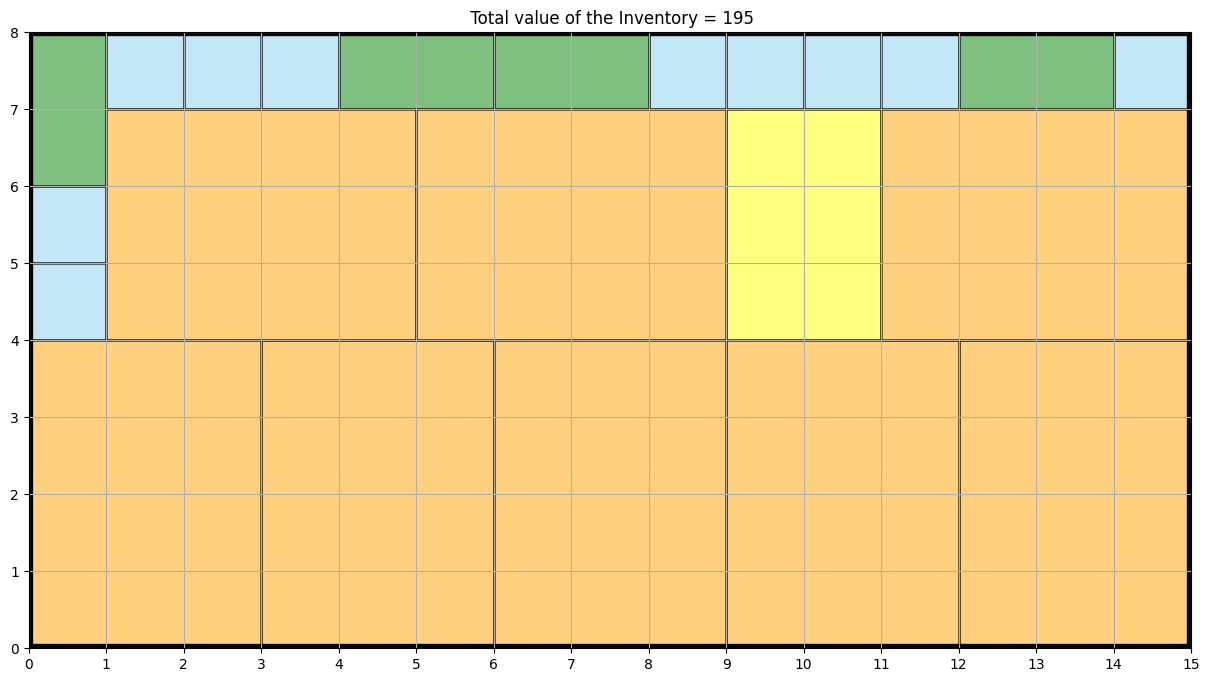

In [38]:
all_vars = model.getVars()
values = model.getAttr("X", all_vars)
names = model.getAttr("VarName", all_vars)

obj = round(model.getObjective().getValue(),0)

fig, ax = plt.subplots(figsize =(15,8))

#ax.plot([0, 10],[0, 10])
for item in Z.keys():
  if Z[item].x >= 0.99:

    coords = (x[item].x,y[item].x)
    if R[item].x == 0.0:
      wid = HEIGHTS[item]
      hig = WIDTHS[item]
    else:
      wid = WIDTHS[item]
      hig = HEIGHTS[item]

    ax.add_patch(Rectangle(coords, wid, hig,
             edgecolor = 'black',
             facecolor = COLORS[item],
             fill = True,
             alpha = 0.5,
             lw=2))
ax.add_patch(Rectangle((0,0), W, H,
             edgecolor = 'black',
             fill = False,
             lw=6))
ax.set_xlim(0, W)
ax.set_ylim(0, H)
ax.set_xticks(range(W+1))
ax.set_yticks(range(H+1))
ax.grid()
ax.set_title(f" Total value of the Inventory = {int(obj)}")
plt.show()